<a href="https://colab.research.google.com/github/soundarya1992/My-Projects/blob/master/Ganit_21_12_2020_soundarya_arunachalam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

file_01 : Contains information of the product quantities that needs to be supplied from source facility location to customer location and who is the current logistics vendor to fulfill the supply

file_02: Have the cost (per product) data that needs to be paid to each logistics vendor (as per the product size etc etc)

file_04: Has the information about the zones (which source facility and customer location combination falls into which zone)

Import the libraries

In [20]:
import pandas as pd
import numpy as np

In [21]:
# To read xlsb files
!pip install pandas
!pip install pyxlsb

Reading the files as Dataframe

In [22]:
prod = pd.read_excel('file_01_current_suppy_network.xlsb', engine='pyxlsb')
cost = pd.read_excel('file_02_cost_data.xlsb', engine='pyxlsb')
zone = pd.read_excel('file_04_zone_info.xlsb', engine='pyxlsb')

Data Analysis

In [23]:
#Dimensions of the dataframes
print('prod', prod.shape)
print('cost', cost.shape)
print('zone', zone.shape)

prod (92851, 6)
cost (18, 7)
zone (92851, 3)


In [24]:
#columns in prod dataframe
print('Columns in prod')
for col in prod.columns: 
    print(col) 
#columns in cost dataframe
print('\n\nColumns in cost')
for col in cost.columns: 
    print(col) 
#columns in zone dataframe
print('\n\nColumns in zone')
for col in zone.columns: 
    print(col) 

Columns in prod
supplier_location
customer_location
shpment_size
payment_option
product_quantity
current_logistics_vendor


Columns in cost
zone
mode
size
cost_with_vendor_v1
cost_with_vendor_v2
cost_with_vendor_v3
cost_with_vendor_v4


Columns in zone
source
destination
shipment_zone


Summarizing the data

In [25]:
#checking for missing values
print(prod.info())
print(cost.info())
print(zone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92851 entries, 0 to 92850
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   supplier_location         92851 non-null  object
 1   customer_location         92851 non-null  int64 
 2   shpment_size              92851 non-null  object
 3   payment_option            92851 non-null  object
 4   product_quantity          92851 non-null  int64 
 5   current_logistics_vendor  92851 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   zone                 18 non-null     object
 1   mode                 18 non-null     object
 2   size                 18 non-null     object
 3   cost_with_vendor_v1  18 non-null     int64 
 4   cost

There are no null values or duplicates. We have a clean data and we can proceed further.

In [26]:
#converting the datatypes
prod['customer_location'] = prod['customer_location'].astype(object)
zone['destination'] = zone['destination'].astype(object)

In [27]:
cost.head()

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4
0,zone_C,cod,large,1480,1480,1100,1080
1,zone_C,cod,medium,480,560,410,410
2,zone_C,cod,small,90,120,80,80
3,zone_C,prepaid,large,1450,1430,1040,1050
4,zone_C,prepaid,medium,450,510,380,370


In [28]:
prod.head()

,supplier_location,customer_location,shpment_size,payment_option,product_quantity,current_logistics_vendor
0,facility_01,201301,small,cod,2156,v1
1,facility_01,122001,small,cod,1859,v1
2,facility_01,248001,small,cod,1805,v1
3,facility_01,201301,small,prepaid,1555,v1
4,facility_01,800001,small,cod,1508,v1


In [29]:
zone.head()

,source,destination,shipment_zone
0,facility_06,110001,zone_a
1,facility_06,110001,zone_a
2,facility_06,110001,zone_a
3,facility_06,110001,zone_a
4,facility_06,110001,zone_a


In [30]:
#Changing the column names similar to prod data inorder to perform merge
zone= zone.rename(columns={"source": "supplier_location", "destination": "customer_location"})

In [31]:
product = prod.merge(zone, on=['supplier_location','customer_location'], how='left')
product = product.drop_duplicates()

product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92851 entries, 0 to 255087
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   supplier_location         92851 non-null  object
 1   customer_location         92851 non-null  object
 2   shpment_size              92851 non-null  object
 3   payment_option            92851 non-null  object
 4   product_quantity          92851 non-null  int64 
 5   current_logistics_vendor  92851 non-null  object
 6   shipment_zone             92851 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.7+ MB


On merging the zone data with the prod, we retain the same number of records. Here we have used left join- to insert values from zone dataframe to a newly added column in prod table. The LEFT JOIN command returns all rows from the left table, and the matching rows from the right table



1. What is the current vendor wise supply volume distributed

In [32]:
product.current_logistics_vendor.value_counts()

v1    74515
v4    10217
v3     4867
v2     3252
Name: current_logistics_vendor, dtype: int64

Using the value_counts, we get unique number of supply against each vendor. We can see the bar chart for the same after executing the below code.

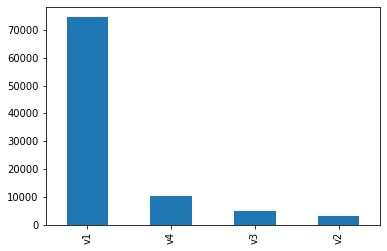

In [33]:
product.current_logistics_vendor.value_counts().plot(kind='bar')





2. What is the current vendor wise cost incurred for fulfilling the supply network

In [34]:
cost.T #Taking transpose to view the results better

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
zone,zone_C,zone_C,zone_C,zone_C,zone_C,zone_C,zone_a,zone_a,zone_a,zone_a,zone_a,zone_a,Zone_B,Zone_B,Zone_B,Zone_B,Zone_B,Zone_B
mode,cod,cod,cod,prepaid,prepaid,prepaid,COD,COD,COD,prepaid,prepaid,prepaid,cod,cod,cod,prepaid,prepaid,prepaid
size,large,medium,small,large,medium,small,large,medium,small,large,medium,small,large,medium,small,large,medium,small
cost_with_vendor_v1,1480,480,90,1450,450,60,740,210,50,720,190,30,870,260,60,850,240,40
cost_with_vendor_v2,1480,560,120,1430,510,70,780,310,90,730,260,30,860,340,90,800,290,40
cost_with_vendor_v3,1100,410,80,1040,380,60,380,160,50,360,130,30,480,190,60,460,170,30
cost_with_vendor_v4,1080,410,80,1050,370,50,710,270,60,680,240,30,850,320,70,810,290,40


The cost dataframe has all the cost incurred. It is very clear to get the cost of each vendor against each zone, the mode of payment and the size of the shipment. Here, I have taken the transpose of the dataframe for viewing it better.

In [35]:
cost

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4
0,zone_C,cod,large,1480,1480,1100,1080
1,zone_C,cod,medium,480,560,410,410
2,zone_C,cod,small,90,120,80,80
3,zone_C,prepaid,large,1450,1430,1040,1050
4,zone_C,prepaid,medium,450,510,380,370
5,zone_C,prepaid,small,60,70,60,50
6,zone_a,COD,large,740,780,380,710
7,zone_a,COD,medium,210,310,160,270
8,zone_a,COD,small,50,90,50,60
9,zone_a,prepaid,large,720,730,360,680


3.            What is the least cost that will be incurred to fulfil this supply network?

In [36]:
#least cost incurred

cost['least_cost'] = cost.min(axis=1)

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4,least_cost,cost_savings
0,zone_C,cod,large,1480,1480,1100,1080,1080,820
1,zone_C,cod,medium,480,560,410,410,410,220
2,zone_C,cod,small,90,120,80,80,80,50
3,zone_C,prepaid,large,1450,1430,1040,1050,1040,810
4,zone_C,prepaid,medium,450,510,380,370,370,230
5,zone_C,prepaid,small,60,70,60,50,50,40
6,zone_a,COD,large,740,780,380,710,380,1090
7,zone_a,COD,medium,210,310,160,270,160,310
8,zone_a,COD,small,50,90,50,60,50,50
9,zone_a,prepaid,large,720,730,360,680,360,1050


To get the least cost, I have added a new column least_cost. This is done by calculating the least cost that is been incurred for each and every zone, mode and size.

4.            How much cost savings can be done if we chose the least cost to fulfil this network


In [40]:
#to calculate cost savings

cost['cost_savings'] = (cost['cost_with_vendor_v1']-cost['least_cost'])+ (cost['cost_with_vendor_v2']-cost['least_cost'])+(cost['cost_with_vendor_v3']-cost['least_cost'])+(cost['cost_with_vendor_v4']-cost['least_cost'])
cost

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4,least_cost,cost_savings
0,zone_C,cod,large,1480,1480,1100,1080,820,1860
1,zone_C,cod,medium,480,560,410,410,220,980
2,zone_C,cod,small,90,120,80,80,50,170
3,zone_C,prepaid,large,1450,1430,1040,1050,810,1730
4,zone_C,prepaid,medium,450,510,380,370,230,790
5,zone_C,prepaid,small,60,70,60,50,40,80
6,zone_a,COD,large,740,780,380,710,380,1090
7,zone_a,COD,medium,210,310,160,270,160,310
8,zone_a,COD,small,50,90,50,60,50,50
9,zone_a,prepaid,large,720,730,360,680,360,1050


After calculating the least_cost, we can see very well how the other costs actually differs from the minimal cost incurred. Then I have added a new column named cost_savings. And, calculated the cost savings by taking the sum of total difference from the least cost. Thereby, this much cost savings can be done if the least cost is chosen. Please refer the last column in each row for individual cost savings.